# Group Members
1. Tejashwini
2. Saifali
3. Amol
4. Tushar


# 1. Introduction
This dataset about any mushroom is a safe to eat or deadly poison. I will examine the data and I will create a machine learning algorythm which is detects any mushroom is edible or poisinous due to it's specifications like cap shape-color or gill color-size. Let's examine the data.

In [33]:

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as Labelencoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV


# 2. Examine Data


In [5]:
# df = pd.read_csv("D:\Python\ML\ML Projects\Classification Project\mushrooms.csv")
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
df["class"].unique()


array(['p', 'e'], dtype=object)

We have a class column which is giving the mushrooms poisinous(p) or edible(e). Also other 22 features has string values too. So we should change the data types to int or float. Also I found about the "veil-type" has just one unique value and it's "p", we should get rid of it. But how can we do that? Let's look on the next section.

# 3. Manipulating Data
We should have a class column as 1 or 0. So we can use below code to change "p" string to 1 and "e" to 0. Also I will get rid of "veil-type" column

In [7]:

df1 = df.drop(columns = ['class','veil-type'])
df.isna().sum()
# df1

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
def LabelEncoder(data):
    for column in df1.columns:
        steps = 1 / (len(data[column].unique())-1)
        print(f'{column} :{steps}')
        value = 0
        val = format(0.0000,'4f')
        for i in data[column].unique():
            for letter in range(len(data[column])):
                if data[column][letter] == i:
                    df[column][letter] = val
            value += steps   
            val = format(value,'4f')

In [9]:

LabelEncoder(df1)


cap-shape :0.2
cap-surface :0.3333333333333333
cap-color :0.1111111111111111
bruises :1.0
odor :0.125
gill-attachment :1.0
gill-spacing :1.0
gill-size :1.0
gill-color :0.09090909090909091
stalk-shape :1.0
stalk-root :0.25
stalk-surface-above-ring :0.3333333333333333
stalk-surface-below-ring :0.3333333333333333
stalk-color-above-ring :0.125
stalk-color-below-ring :0.125
veil-color :0.3333333333333333
ring-number :0.5
ring-type :0.25
spore-print-color :0.125
population :0.2
habitat :0.16666666666666666


In [12]:
le = Labelencoder()
df = df.drop('veil-type',axis = 1)
df['class'] = le.fit_transform(df['class'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.000000,0.000000,0.111111,0.000000,0.125000,0.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.200000,0.166667
2,0,0.200000,0.000000,0.222222,0.000000,0.250000,0.000000,0.000000,1.000000,0.090909,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.200000,0.333333
3,1,0.000000,0.333333,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0.000000,0.000000,0.333333,1.000000,0.375000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.125000,0.400000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.800000,0.000000,0.000000,1.000000,0.375000,1.000000,0.000000,1.000000,0.909091,0.000000,1.000000,0.000000,0.000000,0.750000,0.875000,0.666667,0.000000,0.000000,1.000000,1.000000,1.000000
8120,0,0.000000,0.000000,0.000000,1.000000,0.375000,1.000000,0.000000,1.000000,0.909091,0.000000,1.000000,0.000000,0.000000,0.750000,0.875000,0.333333,0.000000,0.000000,1.000000,0.600000,1.000000
8121,0,0.600000,0.000000,0.000000,1.000000,0.375000,1.000000,0.000000,1.000000,0.090909,0.000000,1.000000,0.000000,0.000000,0.750000,0.875000,0.666667,0.000000,0.000000,1.000000,1.000000,1.000000
8122,1,0.800000,0.333333,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.727273,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.500000,0.600000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# 3.1  Converting Data Types

In [15]:
def convert_data_type(data):
    for column in data.columns[1:]:
#         print(column)
        df[column] = df[column].astype('float64')
        

In [16]:
convert_data_type(df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   int64  
 1   cap-shape                 8124 non-null   float64
 2   cap-surface               8124 non-null   float64
 3   cap-color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill-attachment           8124 non-null   float64
 7   gill-spacing              8124 non-null   float64
 8   gill-size                 8124 non-null   float64
 9   gill-color                8124 non-null   float64
 10  stalk-shape               8124 non-null   float64
 11  stalk-root                8124 non-null   float64
 12  stalk-surface-above-ring  8124 non-null   float64
 13  stalk-surface-below-ring  8124 non-null   float64
 14  stalk-co

In [18]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,0.25,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,0.25,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,0.00,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,0.00,0.0,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.8,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,1.00,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8120,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,1.00,0.0,0.0,0.75,0.875,0.333333,0.0,0.00,1.000,0.6,1.000000
8121,0,0.6,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.090909,0.0,1.00,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8122,1,0.8,0.333333,0.000000,1.0,0.750,0.0,0.0,0.0,0.727273,1.0,1.00,0.0,1.0,0.00,0.000,0.000000,0.0,0.25,0.500,0.6,1.000000


# 4. Preparing Data for Machine Learning

In [19]:
x = df.drop(columns = ['class']).values
y = df['class'].values
x.shape,y.shape

((8124, 21), (8124,))

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

# Models Training And Fitting

In [46]:
names = []
accuracy = []
auc = []
time = []
def Model(model,name):
    before = datetime.datetime.now()
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    after = datetime.datetime.now()
    total_time = after - before
    time.append(total_time.microseconds/(1e+6))
    names.append(name)
    acc  = accuracy_score(ytest,pred)
    # print(f'Accuracy: {acc}')
    print(f'----------------------------------{name} Summary ---------------------------------\n {classification_report(ytest,pred)}')
    accuracy.append(acc)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'{name} Plots')
    #probability of positive class
    pred_prob=model.predict_proba(xtest)[:,1]
    fpr,tpr,_=roc_curve(ytest,pred_prob)
    auc1=roc_auc_score(ytest,pred_prob)
    auc.append(auc1)
    sns.heatmap(confusion_matrix(ytest,pred),annot = True,ax = axes[0])
    axes[0].set_title('Confusion Matrix')
    sns.lineplot(fpr,tpr,ax = axes[1])
    plt.plot(fpr,tpr,label="ROC curve")
    plt.title('ROC Curve')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend() 
    return pd.DataFrame({'Model':names,'Accuracy':accuracy,'AUC':auc,'Total Time Taken By Model(in s)':time})




In [47]:
models={"LogisticRegression":LogisticRegression(),"DecisionTreeClassifier":DecisionTreeClassifier(),"SVM":SVC(probability=True)
        ,"KNN":KNeighborsClassifier(),"GNB":GaussianNB(),"RandomForestClassifier":RandomForestClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":GradientBoostingClassifier(),
       "XGBClassifier":XGBClassifier()}

In [48]:
def ResultOfAllModels(models):
  for name, model in models.items():
    result = Model(model,name)
  return result

----------------------------------LogisticRegression Summary ---------------------------------
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       858
           1       0.96      0.99      0.98       767

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


----------------------------------DecisionTreeClassifier Summary ---------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


----------------------------------SVM Summary ---------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


----------------------------------KNN Summary ---------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


----------------------------------GNB Summary ---------------------------------
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       858
           1       0.96      0.87      0.92       767

    accuracy                           0.92      1625
   macro avg       0.93      0.92      0.92      1625
weighted avg       0.93      0.92      0.92      1625



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


----------------------------------RandomForestClassifier Summary ---------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


----------------------------------AdaBoostClassifier Summary ---------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


----------------------------------GradientBoostingClassifier Summary ---------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


----------------------------------XGBClassifier Summary ---------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


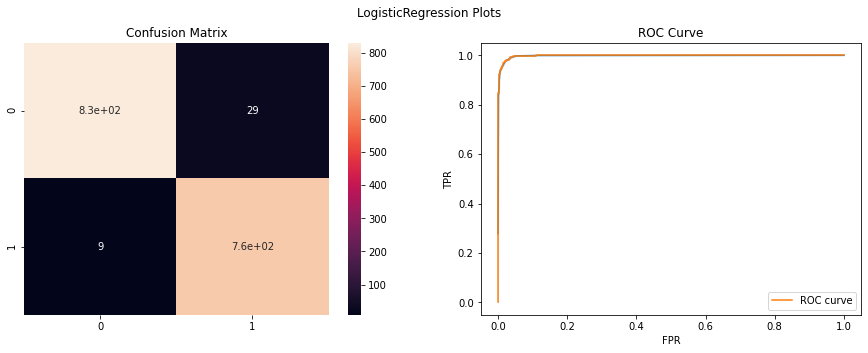

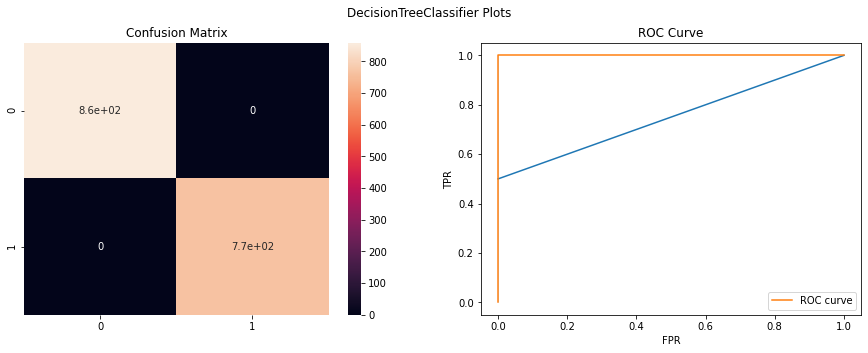

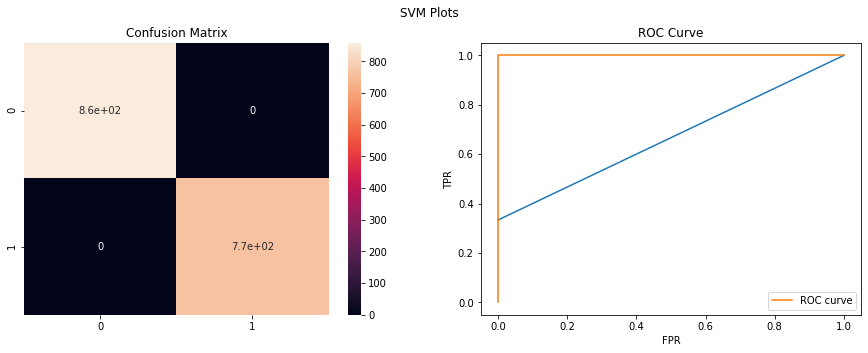

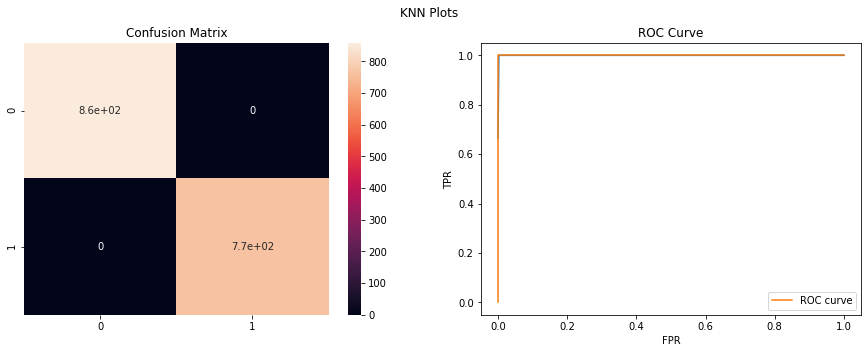

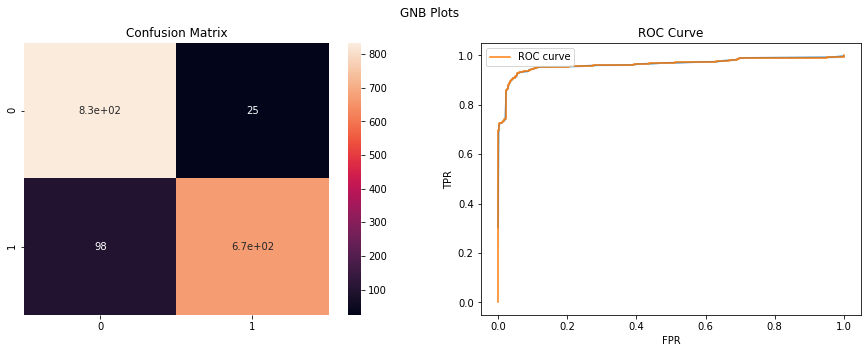

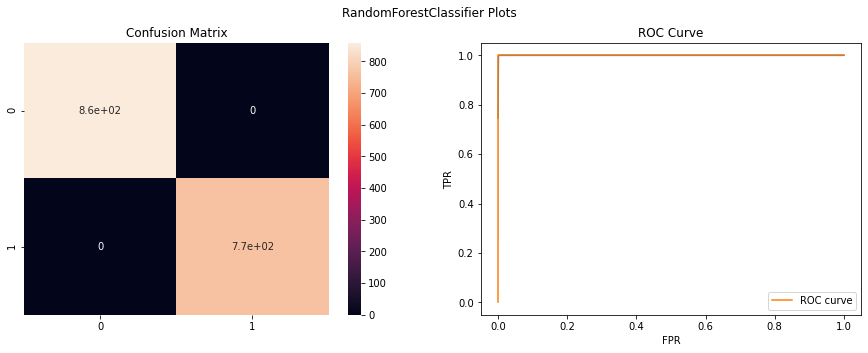

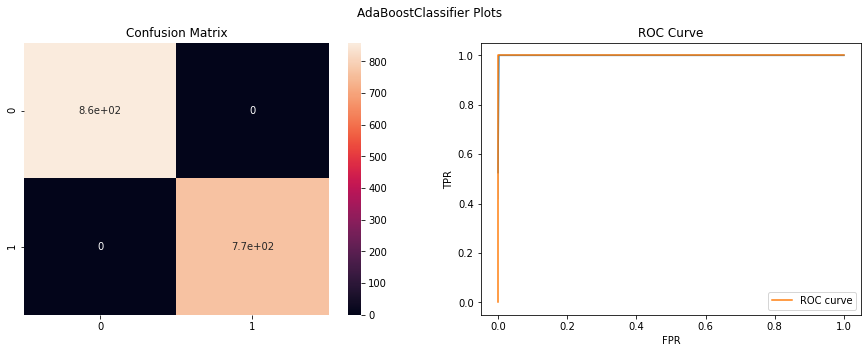

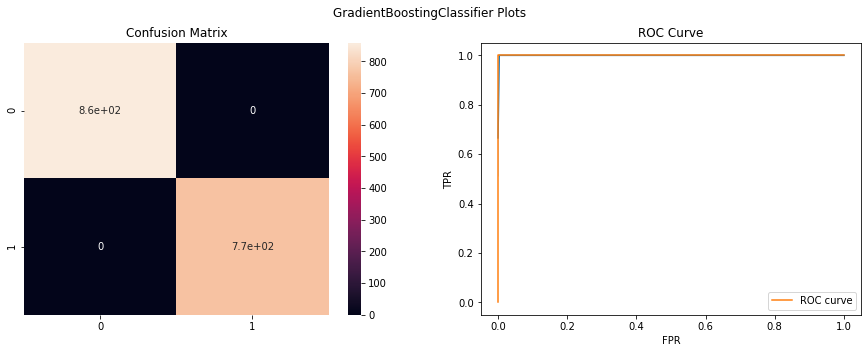

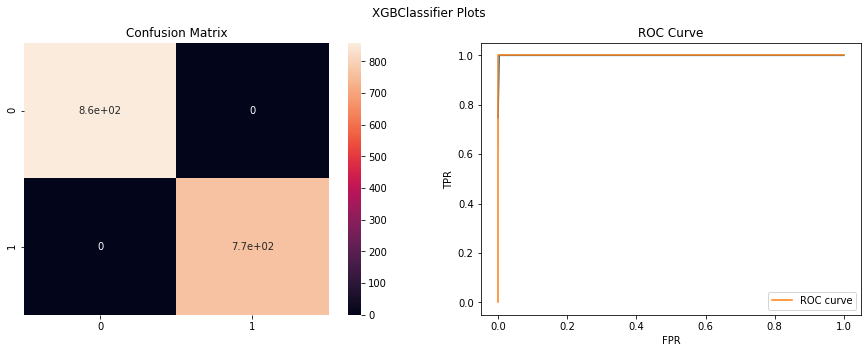

In [49]:
result = ResultOfAllModels(models)

In [50]:
result

,Model,Accuracy,AUC,Total Time Taken By Model(in s)
0,LogisticRegression,0.976615,0.998262,0.107284
1,DecisionTreeClassifier,1.000000,1.000000,0.008286
2,SVM,1.000000,1.000000,0.957549
3,KNN,1.000000,1.000000,0.133249
4,GNB,0.924308,0.963979,0.004045
5,RandomForestClassifier,1.000000,1.000000,0.320271
6,AdaBoostClassifier,1.000000,1.000000,0.303162
7,GradientBoostingClassifier,1.000000,1.000000,0.660308
8,XGBClassifier,1.000000,1.000000,0.449934


In [51]:
def Best_Model(result):
  result = result[result.Accuracy == 1.0 ]
  return result[result['Total Time Taken By Model(in s)'] == result['Total Time Taken By Model(in s)'].min()]


In [52]:
Best_Model(result)

,Model,Accuracy,AUC,Total Time Taken By Model(in s)
1,DecisionTreeClassifier,1.0,1.0,0.008286


# 6. Conclusion

- With confusion matrix we saw that our train and test datas - balanced, so there is no problem in there.
- Most of classfication methods hit 100% accuracy with this dataset.
- This system  gives us the model of high **Accuracy** with **minimum Time** took to build the model.